In [20]:
from tensorflow.keras.datasets.mnist import load_data

In [21]:
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
y_train[4], x_train[4]

3 <class 'numpy.uint8'>


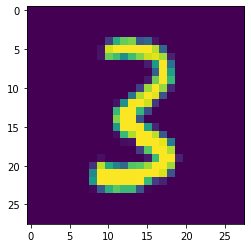

In [11]:
import matplotlib.pyplot as plt
plt.imshow(x_train[50000])
print(y_train[50000], type(y_train[50000]))

In [23]:
x_train = x_train.reshape(-1, 28*28)
x_train.shape

(60000, 784)

In [24]:
x_test = x_test.reshape(-1, 28*28)
x_test.shape

(10000, 784)

In [25]:
y_train[2:10], y_train.shape

(array([4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8), (60000,))

In [26]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# apply model

In [31]:
import tensorflow as tf

In [32]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(784,))) # input
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden
model.add(tf.keras.layers.Dense(64, activation='relu'))
# 3개 이상 --> softmax
model.add(tf.keras.layers.Dense(10, activation='softmax')) # output
# binary --> sigmoid

# regression --> loss : mse
# binary classification --> loss : binary crossentropy
# over 3 classification --> loss : categorical crossentropy (sparse_categorical_crossentropy)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [33]:
hist = model.fit(x_train, y_train, epochs=100, validation_split=0.3)

Epoch 1/100
1313/1313 [==============================] - 4s 3ms/step - loss: 2.0612 - acc: 0.8320 - val_loss: 0.5730 - val_acc: 0.8888
Epoch 2/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4368 - acc: 0.9006 - val_loss: 0.3884 - val_acc: 0.9126
Epoch 3/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3242 - acc: 0.9177 - val_loss: 0.3471 - val_acc: 0.9182
Epoch 4/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2811 - acc: 0.9273 - val_loss: 0.2859 - val_acc: 0.9335
Epoch 5/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2525 - acc: 0.9337 - val_loss: 0.2825 - val_acc: 0.9314
Epoch 6/100
1313/1313 [==============================] - 3s 3ms/step - loss: 0.2264 - acc: 0.9420 - val_loss: 0.2618 - val_acc: 0.9378
Epoch 7/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1881 - acc: 0.9501 - val_loss: 0.2323 - val_acc: 0.9450
Epoch 8/100
1313/1313 [==============================] 

# evaluation

In [34]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

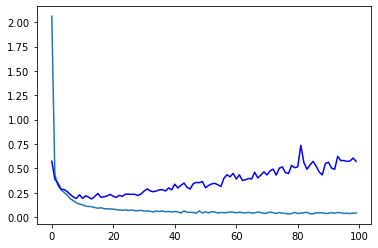

In [40]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'], 'b-')
plt.show()

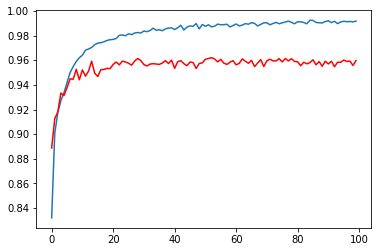

In [41]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'], 'r-')
plt.show()

# service

In [44]:
y_test[30]

3

In [45]:
model.predict(x_test[30])

ValueError: ignored